In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# fungsi untuk mengkonversi gambar ke grayscale
def convertToGray(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

In [24]:
# fungsi untuk menampilkan histogram
def showHistogram(image, title='Histogram'):
  hist = cv2.calcHist([image], [0], None, [256], [0, 256])
  hist = cv2.normalize(hist, hist).flatten()

  plt.figure(figsize=(6, 3))
  plt.plot(hist, color='black')
  plt.title(title)
  plt.xlabel('Pixel Value')
  plt.ylabel('Normalized Frequency')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [25]:
# histogram equalization
def histogramEqualization(image):
  gray = convertToGray(image)
  equalized = cv2.equalizeHist(gray)

  # Tampilkan gambar
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(gray, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title("Equalized Image")
  plt.imshow(equalized, cmap='gray')
  plt.axis('off')
  plt.tight_layout()
  plt.show()

  # Tampilkan histogram
  showHistogram(gray, title="Original Histogram")
  showHistogram(equalized, title="Equalized Histogram")

In [26]:
# spatial sharpening
def spatialSharpening(image, amount=1.5, sigma=1.0):
  gray = convertToGray(image)
  blurred = cv2.GaussianBlur(gray, (5, 5), sigma)
  sharpened = cv2.addWeighted(gray, 1 + amount, blurred, -amount, 0)

  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.title("Original image")
  plt.imshow(gray, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Sharpened Image\n(amount={amount}, sigma={sigma})")
  plt.imshow(sharpened, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return sharpened


In [27]:
def spatialSmoothing(image, kernel_size=5, sigma=1.0):
  # image = convertToGray(image)  # jika ingin mengkonversi ke grayscale

  blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Smoothed Image\n(kernel={kernel_size}, sigma={sigma})")
  plt.imshow(blurred, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  return blurred

In [28]:
# ganti dengan path gambar
img = cv2.imread('../../../images/kucing.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Histogram Equalization


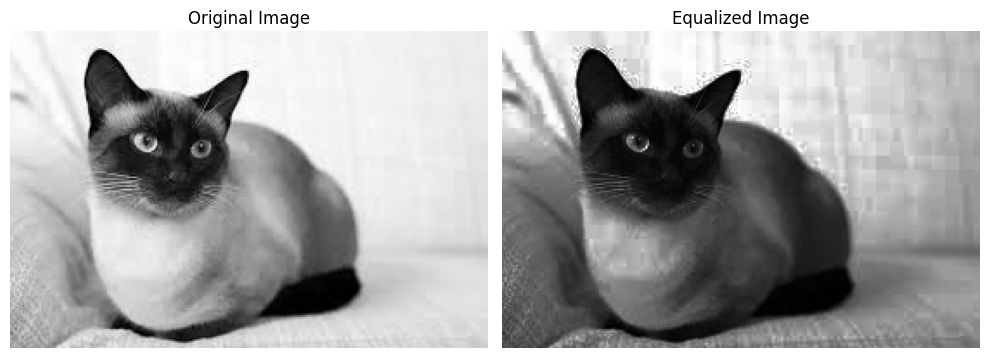

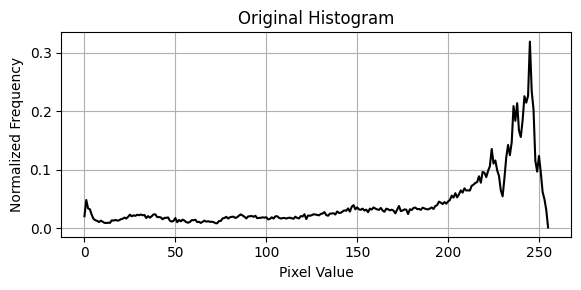

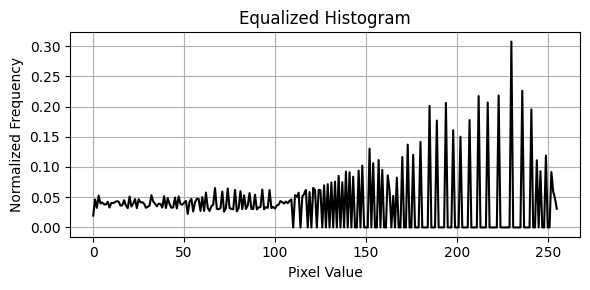

In [29]:
print("Histogram Equalization")
histogramEqualization(img_rgb)

Spatial Sharpening


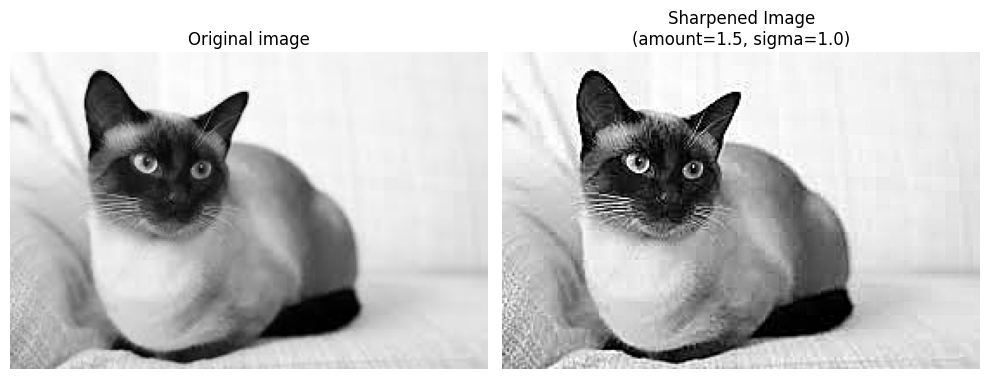

In [ ]:
# ubah parameter amount dan sigma sesuai kebutuhan
print("Spatial Sharpening")
_ = spatialSharpening(img_rgb, amount=1.5, sigma=1.0)

Spatial Smoothing


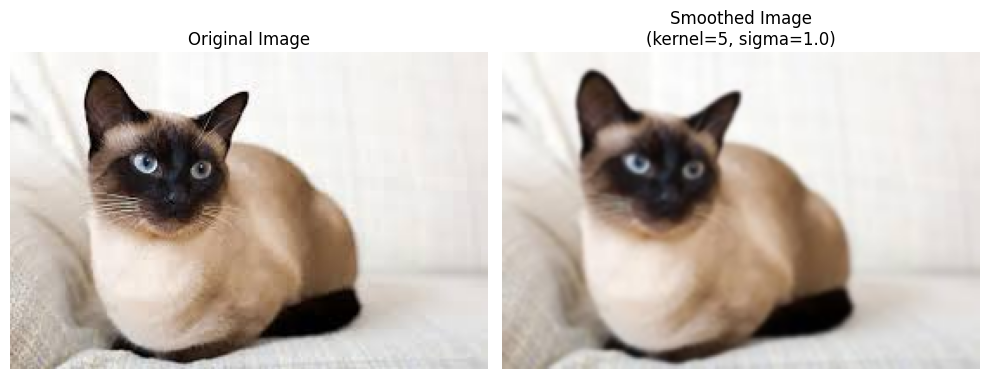

In [ ]:
# ubah parameter kernel dan sigma sesuai kebutuhan, kernel_size harus ganjil
print("Spatial Smoothing")
_ = spatialSmoothing(img_rgb, kernel_size=5, sigma=1.0)